In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


            Open        High         Low       Close   Adj Close
0     262.000000  267.899994  250.029999  254.259995  254.259995
1     247.699997  266.700012  245.000000  265.720001  265.720001
2     266.579987  272.450012  264.329987  264.559998  264.559998
3     267.079987  267.619995  250.000000  250.100006  250.100006
4     253.850006  255.800003  236.110001  249.470001  249.470001
...          ...         ...         ...         ...         ...
1004  401.970001  427.700012  398.200012  427.140015  427.140015
1005  432.959991  458.480011  425.540009  457.130005  457.130005
1006  448.250000  451.980011  426.480011  429.480011  429.480011
1007  421.440002  429.260010  404.279999  405.600006  405.600006
1008  407.309998  412.769989  396.640015  410.170013  410.170013

[1009 rows x 5 columns]
0       11896100
1       12595800
2        8981500
3        9306700
4       16906900
          ...   
1004    20047500
1005    22542300
1006    14346000
1007     9905200
1008     7782400
Name: Vo

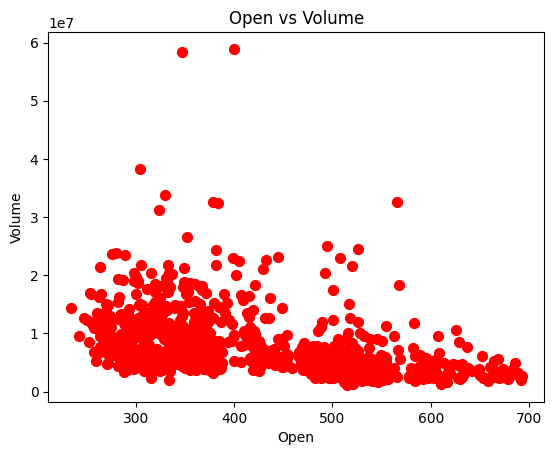

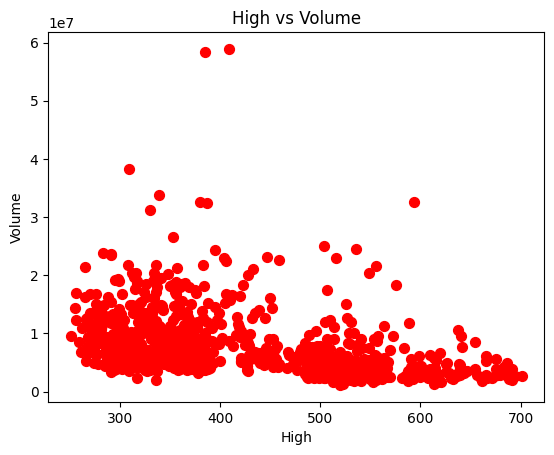

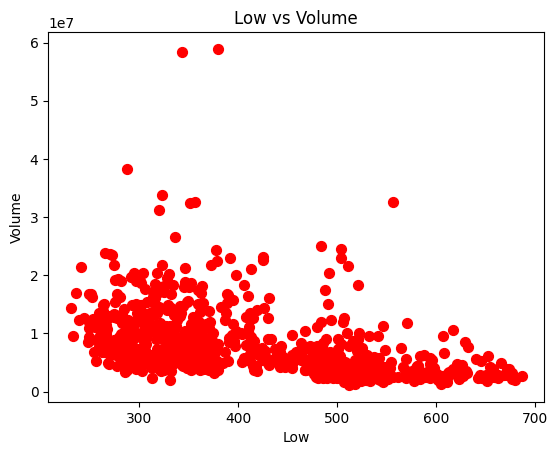

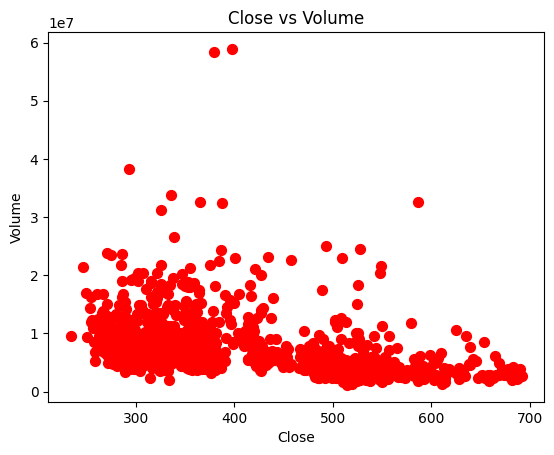

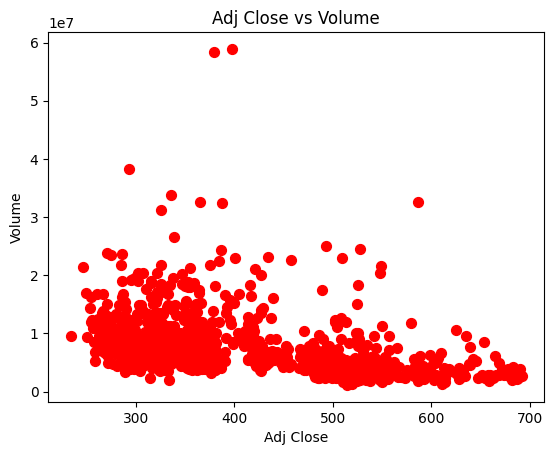

Equation is :
 y = 14551605.44285 + 14551605.44285 * Open + 29026047.39471 * High + 164044428.86458 * Low + -248284010.81009 * Close + 20568223.30915 * Adj Close


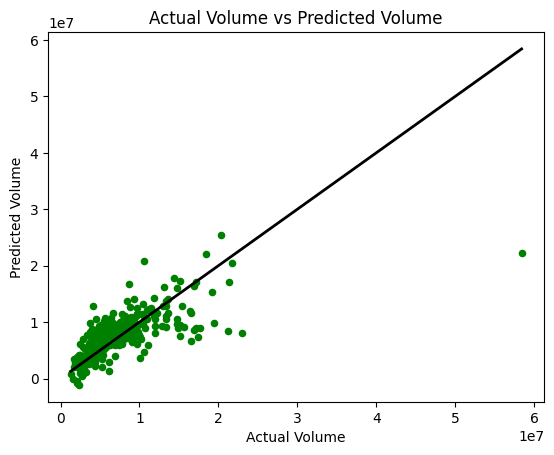

Mean Squared Error (MSE): 13975974430293.28711
Mean Absolute Error (MAE): 2368762.89286
Root Mean Squared Error (RMSE): 3738445.45638


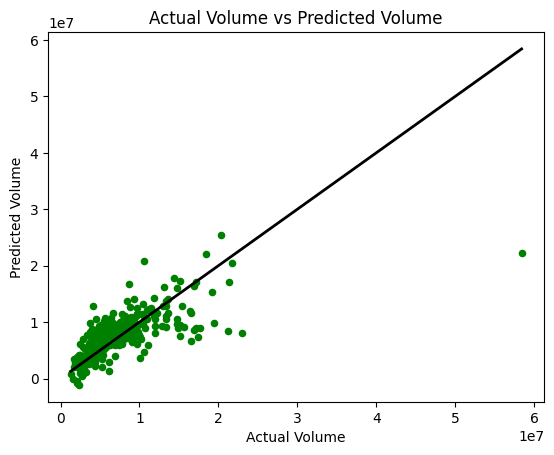

Enter opening price: 262
Enter high price: 254.259
Enter low price: 250.02
Enter closing price: 254.25
Enter Adjusted closing price: 254.25
Predicted volume for your features is: -2287878368.50216


In [3]:
#2203A52099 CAPSTON PROJECT STAT ML WITH LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('/content/NFLX.csv')

features = data.drop('Date', axis=1)
features = features.drop('Volume', axis=1)
target = data['Volume']
print(features)
print(target)
numerical_features = ['Open', 'High', 'Low', 'Close', 'Adj Close']

for feature in numerical_features:
    plt.scatter(features[feature], target, c='red', s=50)
    plt.xlabel(feature)
    plt.ylabel('Volume')
    plt.title(f'{feature} vs Volume')
    plt.show()

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=13)

def linear_regression(X, y):
    X_transpose = X.T
    coeff = (np.linalg.pinv(X_transpose @ X))@ X_transpose @ y
    return coeff

X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))

y_train = y_train.to_numpy()

coeff = linear_regression(X_train, y_train)

X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))
y_pred = X_test @ coeff

equation = f'y = {coeff[0]:.5f}'
for feature, coef in zip(features.columns, coeff):
    equation += f' + {coef:.5f} * {feature}'
print('Equation is :\n',equation)

plt.scatter(y_test, y_pred, c='green', s=20)
plt.xlabel('Actual Volume')
plt.ylabel('Predicted Volume')
plt.title('Actual Volume vs Predicted Volume')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='black', linewidth=2)
plt.show()

residuals = y_test - y_pred
mse = np.mean(residuals**2)
mae = np.mean(np.abs(residuals))
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse:.5f}")
print(f"Mean Absolute Error (MAE): {mae:.5f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")

plt.scatter(y_test, y_pred, c='green', s=20)
plt.xlabel('Actual Volume')
plt.ylabel('Predicted Volume')
plt.title('Actual Volume vs Predicted Volume')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='black', linewidth=2)
plt.show()

Open = float(input("Enter opening price: "))
High = float(input("Enter high price: "))
Low = float(input("Enter low price: "))
Close = float(input("Enter closing price: "))
Adj_Close = float(input("Enter Adjusted closing price: "))

predicted_volume = (
    coeff[0] +
    coeff[1] * Open +
    coeff[2] * High +
    coeff[3] * Low +
    coeff[4] * Close +
    coeff[5] * Adj_Close
)

print(f'Predicted volume for your features is: {predicted_volume:.5f}')


In [4]:
#2203A52099 CAPSTON PROJECT STAT ML WITH SVM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=23)

svr = SVR(kernel='linear')  #kernels = 'linear', 'rbf', 'poly'.

svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}\n\n")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}\n\n")

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}\n\n")



Open = float(input("Enter opening price: "))
High = float(input("Enter high price: "))
Low = float(input("Enter low price: "))
Close = float(input("Enter closing price: "))
Adj_Close = float(input("Enter Adjusted closing price: "))


user_inputs_scaled = scaler.transform(np.array([[Open, High,Low,Close,Adj_Close]]))


predicted_price = svr.predict(user_inputs_scaled)[0]


print(f"Predicted Price: {predicted_price:.2f}")


Mean Squared Error: 33588164847517.215


Mean Absolute Error: 3558447.5063566715


Root Mean Squared Error: 5795529.72967245


Enter opening price: 266.5
Enter high price: 272.45
Enter low price: 264.3
Enter closing price: 272.45
Enter Adjusted closing price: 264.55
Predicted Price: 5889346.15


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


<ipython-input-10-eb453230e618>:13: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.781e+15, tolerance: 2.507e+12
  model = cd_fast.enet_coordinate_descent(


Training Linear Regression
Linear Regression - MSE: 15411068344867.20
Training Ridge Regression
Ridge Regression - MSE: 18341138309821.75
Training Lasso Regression
Lasso Regression - MSE: 15518884286115.05
Training SVR
SVR - MSE: 27749513733306.93
Training KNN Regression
KNN Regression - MSE: 18394532749485.15


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.814e+15, tolerance: 2.484e+12
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.746e+15, tolerance: 2.078e+12
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.995e+15, tolerance: 2.281e

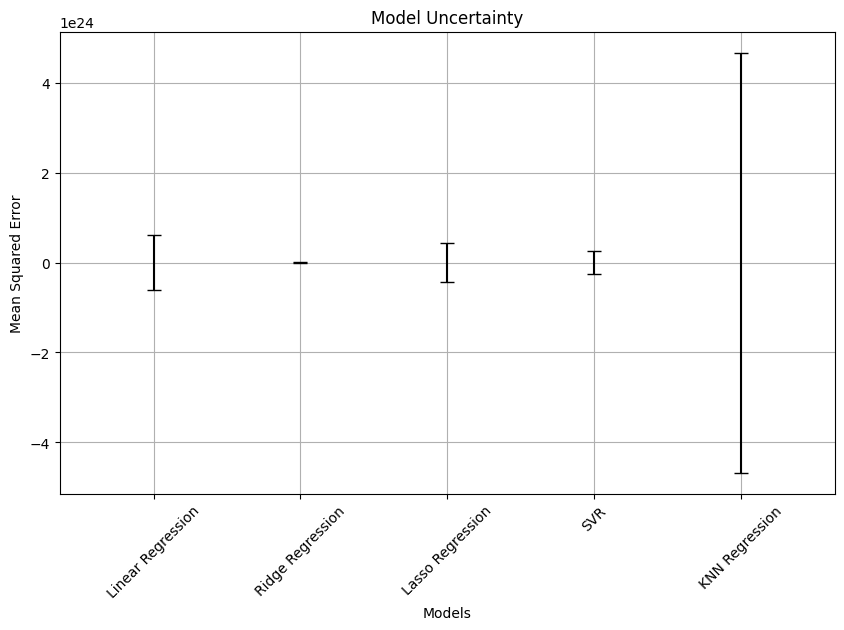

The Best Model is LASSO REGRESSION with an average MSE of 15655797790030.66


In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
import matplotlib.pyplot as plt

data = pd.read_csv('/content/NFLX.csv')
data.fillna(data.mean(), inplace=True)


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=1.0),
    "SVR": SVR(kernel='linear'),
    "KNN Regression": KNeighborsRegressor(n_neighbors=5)
}

results = {}

for model_name, model in models.items():
    print(f"Training {model_name}")

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)

    results[model_name] = {
        "MSE": mse
    }
    print(f"{model_name} - MSE: {mse:.2f}")

num_iterations = 100
model_uncertainty = {}

for model_name, model in models.items():
    mse_samples = []

    for _ in range(num_iterations):
        X_sample, y_sample = resample(X_train_scaled, y_train, replace=True, random_state=np.random.randint(1, 100))
        model.fit(X_sample, y_sample)
        y_pred = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        mse_samples.append(mse)

    avg_mse = np.mean(mse_samples)
    uncertainty = np.var(mse_samples)

    model_uncertainty[model_name] = {
        "MSE": avg_mse,
        "Uncertainty": uncertainty
    }

# Create lists of model names and corresponding MSE values
model_names = list(model_uncertainty.keys())
mse_values = [value['MSE'] for value in model_uncertainty.values()]
uncertainties = [value['Uncertainty'] for value in model_uncertainty.values()]

# Create bar graph
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, yerr=uncertainties, capsize=5)
plt.title("Model Uncertainty")
plt.xlabel("Models")
plt.ylabel("Mean Squared Error")
plt.xticks(rotation=45)
plt.grid()

# Show the bar graph
plt.show()

best_model_name = min(model_uncertainty, key=lambda k: model_uncertainty[k]["MSE"])

print(f"The Best Model is {best_model_name.upper()} with an average MSE of {model_uncertainty[best_model_name]['MSE']:.2f}")

